In [11]:
## linear regression 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import urllib2
import json
%matplotlib inline 

In [12]:
# for beautifing plot 
jsonFile = urllib2.urlopen('https://raw.githubusercontent.com/fedhere/PUI2015_fbianco/master/fbb_matplotlibrc.json')
s = json.load(jsonFile)
plt.rcParams.update(s)

/Users/bhagwatsinghbisht/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/bhagwatsinghbisht/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
#  advertising data  :
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


#
What are the features?
TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
Radio: advertising dollars spent on Radio
Newspaper: advertising dollars spent on Newspaper
What is the response?
Sales: sales of a single product in a given market (in thousands of widgets) 

In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


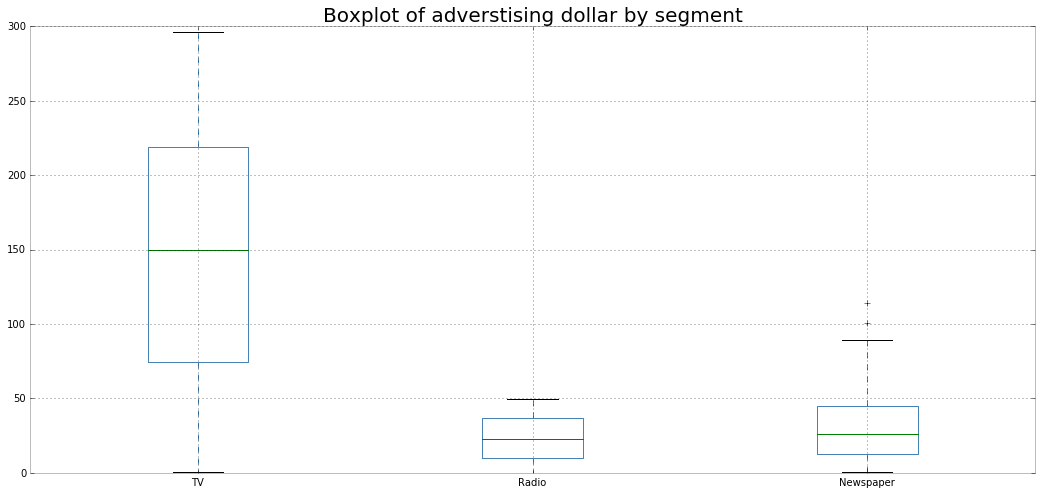

In [51]:
## plotting box plot 
ax = plt.figure(figsize=(18,8), dpi=300).add_subplot(111)
ax.set_title('Boxplot of adverstising dollar by segment',size = 20)

data[['TV','Radio','Newspaper']].plot.box(ax=ax)


#### OBSERVATION  : The Money spent on TV advertisement is way greater than the 
#### Radio and  newspaper which may be due higher reach of TV 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12659fc10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12f1c6550>]], dtype=object)

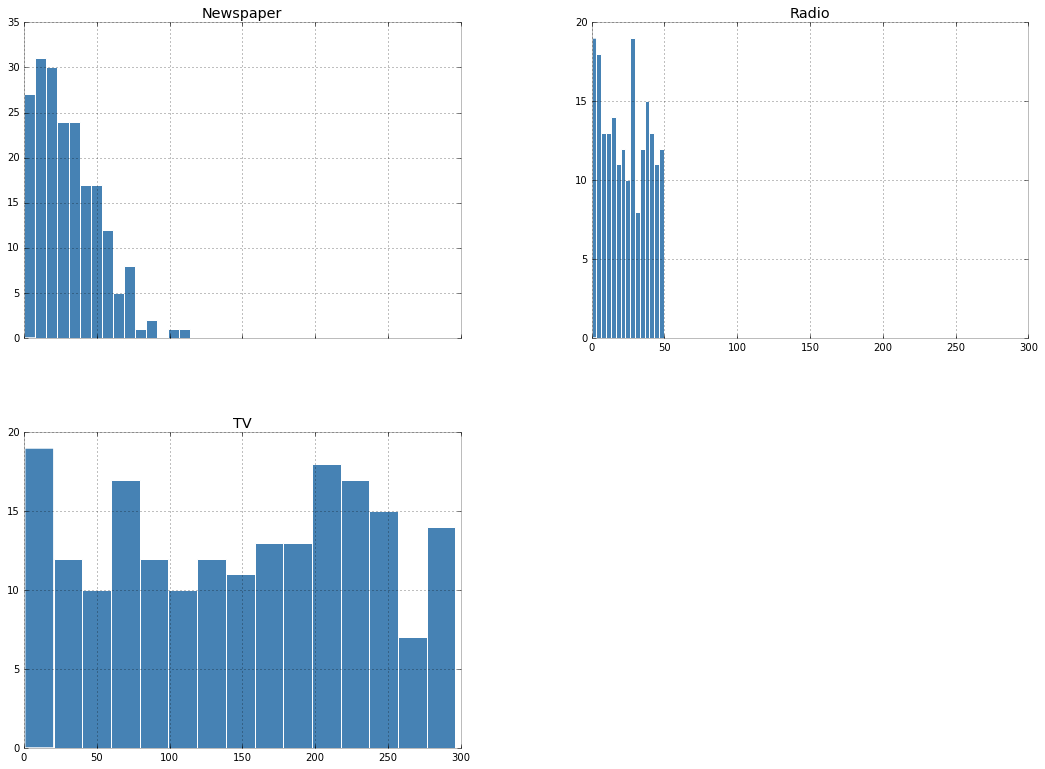

In [78]:
ax = plt.figure(figsize=(18,13), dpi=300).add_subplot(111)
data[['TV','Radio','Newspaper']].hist(sharex=True,sharey=False,ax=ax,bins=15)

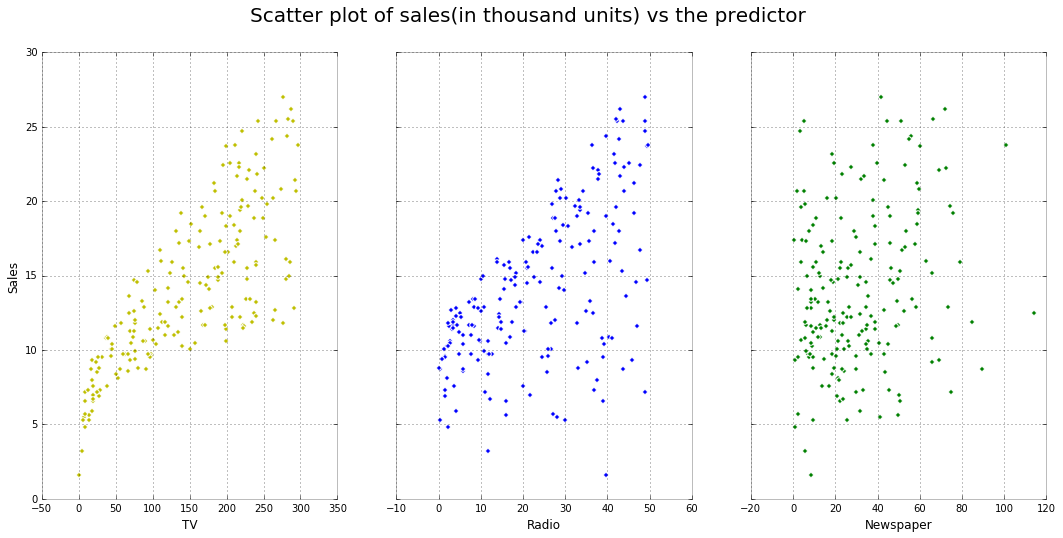

In [169]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
fig.suptitle('Scatter plot of sales(in thousand units) vs the predictor',fontsize=20)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(18, 8),c='y')
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2],c='g')

In [122]:
## creating train and test data set
train_x = data[['TV','Newspaper','Radio']][1:160]
test_x = data[['TV','Newspaper','Radio']][161:200]
train_y = data.Sales[1:160]
test_y = data.Sales[161:200]

In [126]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 2 to 160
Data columns (total 3 columns):
TV           159 non-null float64
Newspaper    159 non-null float64
Radio        159 non-null float64
dtypes: float64(3)
memory usage: 5.0 KB


In [123]:
#training the data using the first 160 values 
clf  = linear_model.LinearRegression()
clf.fit(train_x,train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [130]:
print('Coefficient \n',clf.coef_)

('Coefficient \n', array([ 0.04713997, -0.0016474 ,  0.17973077]))


In [131]:
##Using the statsmodel to check  :
import statsmodels.formula.api as smf

In [139]:
dataTR = data[1:160]
dataT = data[161:200]

In [140]:
lm = smf.ols(formula='Sales~TV+Newspaper+Radio',data=dataTR).fit()

In [141]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     441.1
Date:                Mon, 08 Aug 2016   Prob (F-statistic):           1.17e-75
Time:                        15:43:01   Log-Likelihood:                -308.15
No. Observations:                 159   AIC:                             624.3
Df Residuals:                     155   BIC:                             636.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9824      0.360      8.283      0.000         2.271     3.694
TV             0.0471      0.002     29.790      0.000         0.044     0.050
Newspaper     -0.0016      0.007     -0.248      0.804        -0.015     0.011
Radio          0.1797      0.010     18.117      0.000         0.160     0.199
==============================================================================
Omnibus:                       52.667   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.305
Skew:                          -1.392   Prob(JB):                     5.07e-29
Kurtosis:                       6.452   Cond. No.                         453.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
lm.predict(dataT)

array([ 13.37539981,  15.07448314,  17.2916462 ,  11.14031051,
        14.50806686,  10.54845861,  13.63354546,  17.28306452,
        18.27885526,   7.39392313,  14.41517069,   7.4908861 ,
        12.1757321 ,  14.05579219,  24.75538997,  20.0863547 ,
        12.34949372,  16.400326  ,  12.55705189,  10.81810535,
        14.20784998,   6.60716369,  24.14995391,  18.72532681,
        20.71962186,   9.89199903,  17.11909803,  18.95655274,
         6.00007056,  12.22176858,   8.47263547,   4.47800571,
        18.38806824,  16.42774411,   5.42537649,   8.29028172,
        12.9870869 ,  23.79088874,  15.45489846])

In [146]:
# checking for only predictor 
data1x = data[['TV','Sales']]

In [149]:
lm1 = smf.ols(formula='Sales~TV',data=data1x).fit()

In [150]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 08 Aug 2016   Prob (F-statistic):           1.47e-42
Time:                        15:49:41   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
x = pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})


In [162]:
y = lm1.predict(x)

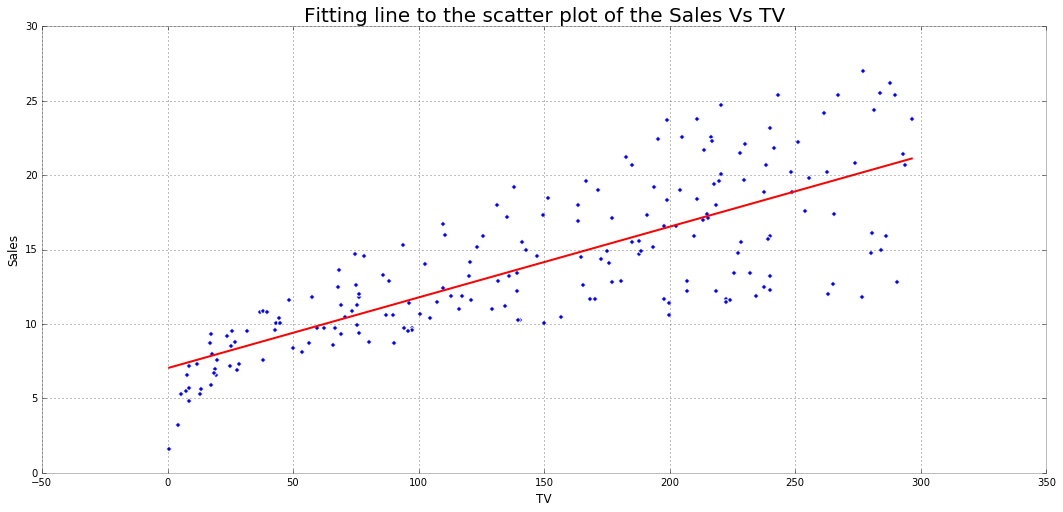

In [173]:
ax = plt.figure(figsize=(18,8)).add_subplot(111)
ax.set_title('Fitting line to the scatter plot of the Sales Vs TV',fontsize=20)
data1x.plot(kind='scatter',x='TV',y='Sales',ax=ax,legend=True)
plt.plot(x,y,c='r')